*Import libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

*Load CSV files*

In [2]:
movies_data = pd.read_csv('tmdb_5000_movies.csv')
credits_data = pd.read_csv('tmdb_5000_credits.csv')
Keywords_data = pd.read_csv('keywords.csv')

*Check first 5 rows of each datasets*

In [3]:
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
Keywords_data.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


*select movies which have more than 55 vote count*

In [6]:
movies_data = movies_data[movies_data['vote_count']>=55]

In [7]:
movies_data = movies_data[['id','original_title','overview','genres']]

*Creating a duplicate column for title so that once can be used to search later and one for creating features*

In [8]:
movies_data['title'] = movies_data['original_title'].copy()

In [9]:
movies_data.reset_index(inplace=True, drop=True)
movies_data.head()

,id,original_title,overview,genres,title
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter


From movies metadata column we are going to work with the following features
1. Genres

2. Original Title

3. Overview

4. id

*Now Working with Keywords*

In [10]:
Keywords_data.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


From movies keywords column we are going to work with the following features
1. keywords (to fetch the keywords)

2. id (to merge dataframe)

In [11]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


From movies credits column we are going to work with the following features
1. cast - To get the name of the actors

2. id - To merge dataframe

In [12]:
credits_data = credits_data[['movie_id','cast']]

*Data Cleaning & Preprocessing*

In [13]:
# Removing the records for which the id is not available
movies_data['id'] = movies_data['id'].astype(str)
movies_data = movies_data[movies_data['id'].str.isnumeric()]


*Merge dataframes into one single entity*

In [14]:
# Merge all dataframe as a single entity
# To merge the ids must be of same datatype
movies_data['id'] = movies_data['id'].astype(int)

# Merge
df = pd.merge(movies_data, Keywords_data, on='id', how='left')

# Reset the index
df.reset_index(inplace=True, drop=True)

In [15]:
# Merge with credits
df['id'] = df['id'].astype(int)

# Merge
merged_data = pd.merge(df, credits_data, left_on='id', right_on='movie_id')

# Reset the index
merged_data.reset_index(inplace=True, drop=True)

In [16]:
merged_data.head()

,id,original_title,overview,genres,title,keywords,movie_id,cast
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


*Let's fetch the genres, keywords, cast to vectorize them later*

In [17]:
# Cleaning the movies metadata
# Fetchin the genre list from the column
merged_data['genres'] = merged_data['genres'].apply(lambda x: [i['name'] for i in eval(x)])

# Replaces spaces in between genre(ex - sci fi to scifi) and make it a string
merged_data['genres'] = merged_data['genres'].apply(lambda x: ' '.join([i.replace(" ","") for i in x]))

In [18]:
# Filling the numm values as []
merged_data['keywords'].fillna('[]', inplace=True)

In [19]:
# Clean the keywords dataframe to extract the keywords
# Fetchin the keyword list from the column
merged_data['keywords'] = merged_data['keywords'].apply(lambda x: [i['name'] for i in eval(x)])

# Remove the expty spaces and join all the keyword wwwith spaces
merged_data['keywords'] = merged_data['keywords'].apply(lambda x: ' '.join([i.replace(" ",'') for i in x]))

In [20]:
# Filling the numm values as []
merged_data['cast'].fillna('[]', inplace=True)

In [21]:
# Clean the cast dataframe to extract the name of aactors from cast column
# Fetchin the cast list from the column
merged_data['cast'] = merged_data['cast'].apply(lambda x: [i['name'] for i in eval(x)])

# Remove the expty spaces and join all the cast with spaces
merged_data['cast'] = merged_data['cast'].apply(lambda x: ' '.join([i.replace(" ",'') for i in x]))

In [22]:
merged_data.head()

,id,original_title,overview,genres,title,keywords,movie_id,cast
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy ScienceFiction,Avatar,cultureclash future spacewar spacecolony socie...,19995,SamWorthington ZoeSaldana SigourneyWeaver Step...
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,Pirates of the Caribbean: At World's End,ocean drugabuse exoticisland eastindiatradingc...,285,JohnnyDepp OrlandoBloom KeiraKnightley Stellan...
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,Spectre,spy basedonnovel secretagent sequel mi6 britis...,206647,DanielCraig ChristophWaltz LéaSeydoux RalphFie...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,The Dark Knight Rises,dccomics crimefighter terrorist secretidentity...,49026,ChristianBale MichaelCaine GaryOldman AnneHath...
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure ScienceFiction,John Carter,basedonnovel mars medallion spacetravel prince...,49529,TaylorKitsch LynnCollins SamanthaMorton Willem...


*merge all content/description of movies as a single feature*

In [23]:
merged_data['tags'] = merged_data['overview'] + ' ' + merged_data['genres'] +  ' ' + merged_data['original_title'] + ' ' + merged_data['keywords'] + ' ' + merged_data['cast']

In [24]:
# Delete useless columns
merged_data.drop(columns=['overview','original_title','keywords','cast'], inplace=True)

In [25]:
merged_data.head()

,id,genres,title,movie_id,tags
0,19995,Action Adventure Fantasy ScienceFiction,Avatar,19995,"In the 22nd century, a paraplegic Marine is di..."
1,285,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Action Adventure Crime,Spectre,206647,A cryptic message from Bond’s past sends him o...
3,49026,Action Crime Drama Thriller,The Dark Knight Rises,49026,Following the death of District Attorney Harve...
4,49529,Action Adventure ScienceFiction,John Carter,49529,"John Carter is a war-weary, former military ca..."


In [26]:
merged_data.drop(merged_data[merged_data['tags'].isnull()].index, inplace=True)

In [27]:
merged_data.head()

,id,genres,title,movie_id,tags
0,19995,Action Adventure Fantasy ScienceFiction,Avatar,19995,"In the 22nd century, a paraplegic Marine is di..."
1,285,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Action Adventure Crime,Spectre,206647,A cryptic message from Bond’s past sends him o...
3,49026,Action Crime Drama Thriller,The Dark Knight Rises,49026,Following the death of District Attorney Harve...
4,49529,Action Adventure ScienceFiction,John Carter,49529,"John Carter is a war-weary, former military ca..."


In [28]:
merged_data.shape

(3616, 5)

In [29]:
merged_data.drop_duplicates(inplace=True)

In [30]:
merged_data.shape

(3593, 5)

*Convert the contents to vectors*

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a tfidf object
tfidf = TfidfVectorizer(max_features=5000)

# Transform the data
vectorized_data = tfidf.fit_transform(merged_data['tags'].values)

In [32]:
vectorized_data

<3593x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 170125 stored elements in Compressed Sparse Row format>

In [33]:
vectorized_dataframe = pd.DataFrame(vectorized_data.toarray(), index=merged_data['tags'].index.tolist())

*Perform Dimension Reduction*

In [34]:
from sklearn.decomposition import TruncatedSVD

# Initialize a PCA object
svd = TruncatedSVD(n_components=3000)

# Fit transform the data
reduced_data = svd.fit_transform(vectorized_dataframe)

# Print the shape
reduced_data.shape

(3593, 3000)

In [35]:
svd.explained_variance_ratio_.cumsum()

array([0.00404289, 0.01108111, 0.01661719, ..., 0.9889709 , 0.98900202,
       0.98903298])

*Compute a similarity metric on vectors for recommendation*

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(reduced_data)

*Making recommendations for a given movie*

In [37]:
def recommendation(movie_title):
    id_of_movie = df[df['title']==movie_title].index[0]
    distances = similarity[id_of_movie]
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:10]

    for i in movie_list:
        print(df.iloc[i[0]].title)

In [38]:
recommendation('The Matrix')

Crazy Heart
Deadfall
Racing Stripes
The Adventurer: The Curse of the Midas Box
Birdman
The Calling
Cellular
Saw III
Adventureland


In [39]:
recommendation('Casino')

DOA: Dead or Alive
300: Rise of an Empire
Timeline
Independence Day
National Lampoon's Loaded Weapon 1
Yogi Bear
The Virgin Suicides
Rendition
Zero Dark Thirty


In [40]:
merged_data.head()

,id,genres,title,movie_id,tags
0,19995,Action Adventure Fantasy ScienceFiction,Avatar,19995,"In the 22nd century, a paraplegic Marine is di..."
1,285,Adventure Fantasy Action,Pirates of the Caribbean: At World's End,285,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Action Adventure Crime,Spectre,206647,A cryptic message from Bond’s past sends him o...
3,49026,Action Crime Drama Thriller,The Dark Knight Rises,49026,Following the death of District Attorney Harve...
4,49529,Action Adventure ScienceFiction,John Carter,49529,"John Carter is a war-weary, former military ca..."


*Create a Model Evaluation *

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

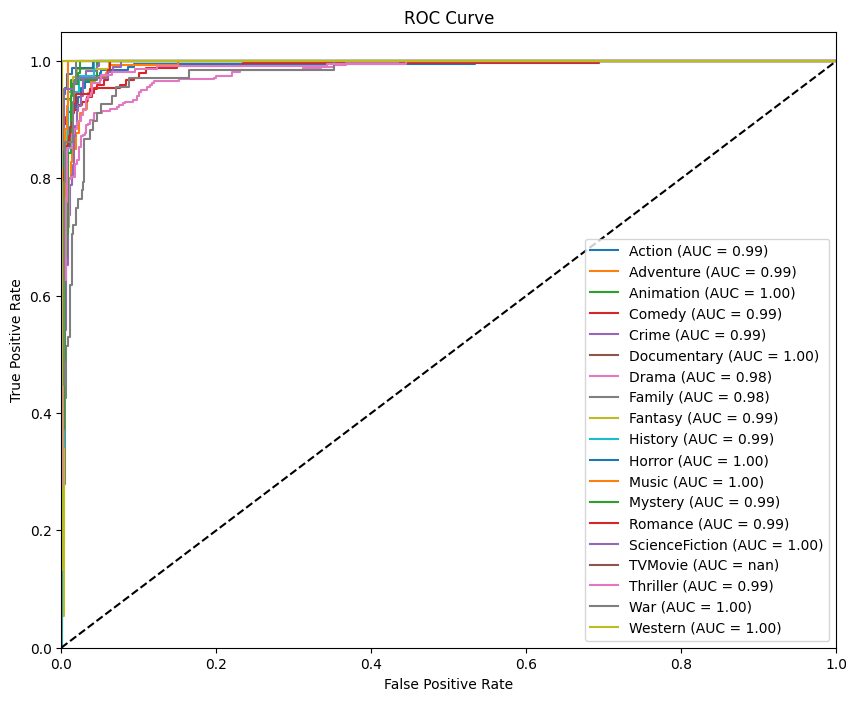

In [45]:
# Initialize OneVsRestClassifier with logistic regression
ovr_clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier using the training data
ovr_clf.fit(X_train, y_train)

# Predict probabilities using the classifier
y_score = ovr_clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(mlb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(mlb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{mlb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
